In [1]:
import re
import numpy as np
import pandas as pd
import h5py
import matplotlib
from matplotlib import pyplot as plt

In [2]:
plt.style.use('seaborn-dark')

In [3]:
matplotlib.rcParams['figure.figsize'] = (14, 10)
matplotlib.rcParams['axes.grid'] = True

In [4]:
filename = 'data/beta_6_x0_0.1_simulation_iterations_100000.hdf5'

In [5]:
match = re.match(r'^.*beta_([^_]+)_x0_([^_]+)_.*$', filename)

In [6]:
beta = float(match.group(1))
x0 = float(match.group(2))
print('beta:', beta)
print('x0:', x0)

beta: 6.0
x0: 0.1


In [7]:
with h5py.File(filename, 'r') as in_file:
    temperature_up = in_file['temperature_up'][:].ravel()
    power_up = in_file['power_up'][:].ravel()
    delta_abs_up = in_file['delta_abs_up'][:].ravel()
    
    temperature_down = in_file['temperature_down'][:].ravel()
    power_down = in_file['power_down'][:].ravel()
    delta_abs_down = in_file['delta_abs_down'][:].ravel()

In [8]:
n_widths =  temperature_up.shape[0] / 455 / 2;
frequency = np.linspace(-n_widths, n_widths, temperature_up.shape[0])
print(n_widths)

30.0


Text(0.5, 1.0, 'Temperature delta mean squared error')

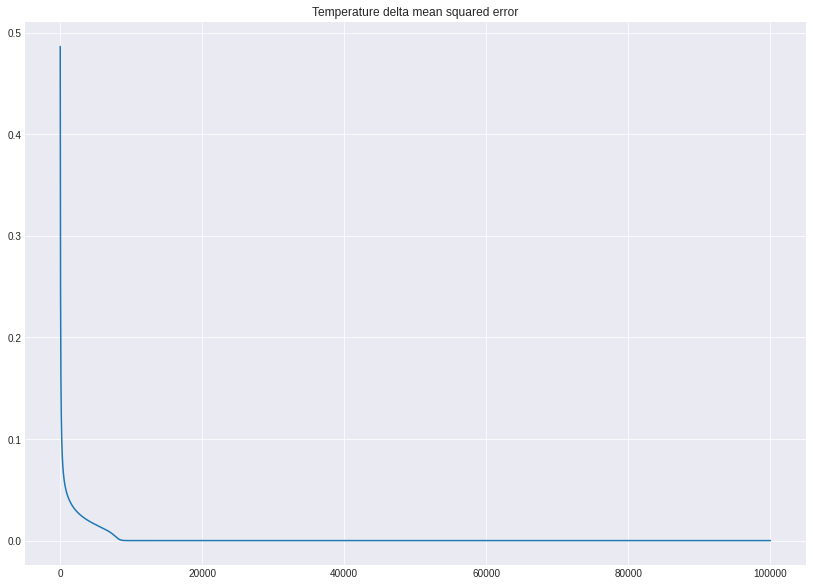

In [9]:
iterations = 10 * np.arange(len(delta_abs_up))
plt.plot(iterations, delta_abs_up)
plt.title('Temperature delta mean squared error')

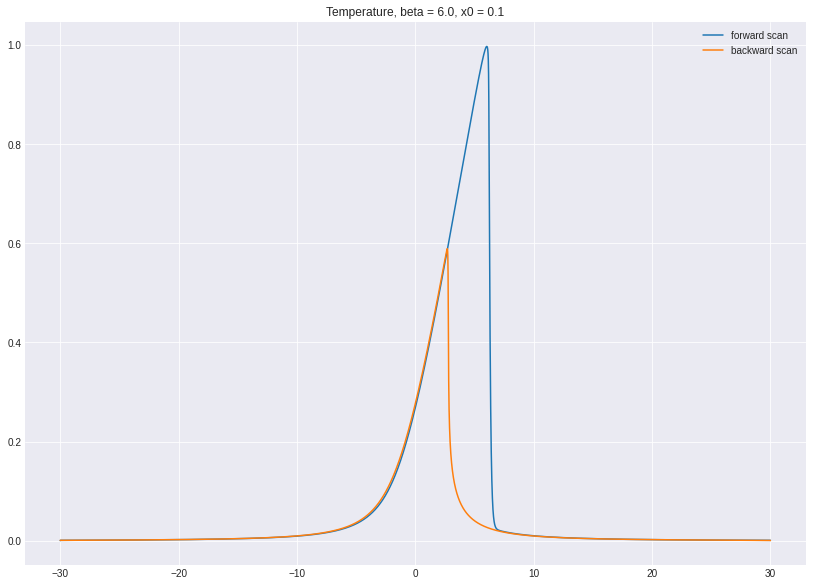

In [10]:
plt.plot(frequency, temperature_up, label='forward scan')
plt.plot(frequency, temperature_down, label='backward scan')
plt.title(f'Temperature, beta = {beta}, x0 = {x0}')
plt.legend()

In [11]:
frequency[np.argmax(power_up)], frequency[np.argmax(power_down)], 

(5.97274625444156, 2.78581633026851)

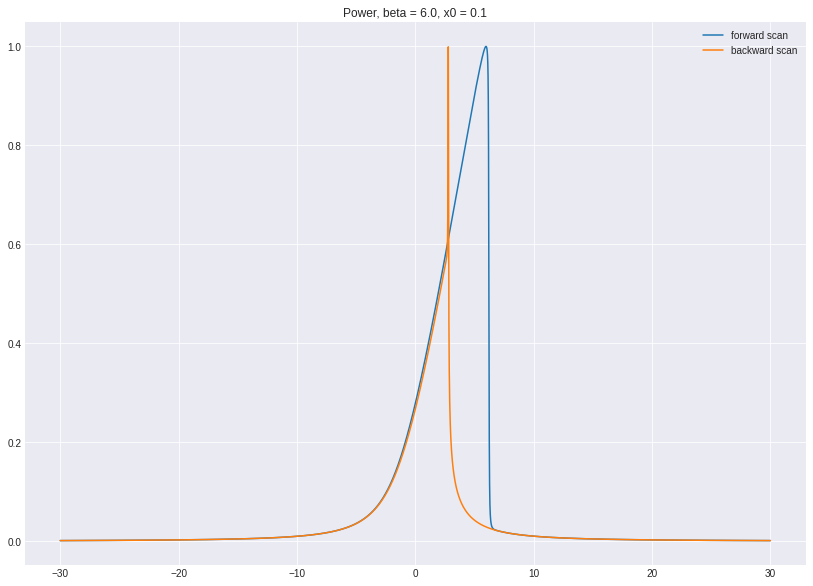

In [12]:
plt.plot(frequency, power_up, label='forward scan')
plt.plot(frequency, power_down, label='backward scan')
plt.title(f'Power, beta = {beta}, x0 = {x0}')
plt.legend()